# THERA BANK BANK PERSONAL LOAN MODELLING

<b>Data Description:</b>

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

<b>Domain:</b> Banking 

<b>Context:</b>

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


<b>Attribute Information:</b>

<b>ID</b> : Customer ID

<b>Age</b> : Customer's age in completed years

<b>Experience</b> : #years of professional experience

<b>Income</b> : Annual income of the customer ($000)

<b>ZIP Code</b> : Home Address ZIP code.

<b>Family</b> : Family size of the customer

<b>CCAvg</b> : Avg. spending on credit cards per month ($000)

<b>Education</b> : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

<b>Mortgage</b> : Value of house mortgage if any. ($000)

<b>Personal Loan</b> : Did this customer accept the personal loan offered in the
                last campaign?

<b>Securities Account</b> : Does the customer have a securities account with the bank?

<b>CD Account</b> : Does the customer have a certificate of deposit (CD)
             account with the bank?

<b>Online</b> : Does the customer use internet banking facilities?

<b>Credit card</b> : Does the customer use a credit card issued by
              UniversalBank?

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## 2. Read the data as a data frame

In [2]:
#load the bank personal loan data
data= pd.read_csv('Bank_Personal_Loan_Modelling.csv');
# read the data as data frame
loandata = pd.DataFrame(data);
# display data of 5 rows.
loandata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 3. Perform basic EDA

### a) Shape of the data:

In [3]:
loandata.shape

(5000, 14)

Details of shape of data:

Bank personal loan data contains total 14 columns (attributes) and 5000 rows(attributes data)

### b) Data type of each attribute

In [4]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Details of each data type

Almost all the attributes having datatype as int64 except CCAvg having data type of float64.

All the attributes having variable type as numbers 



## c) Checking the presence of missing values

In [5]:
loandata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The Bank personal load data does not contain any missing values

## d) 5 point summary of numerical attributes

In [6]:
loandata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Customer experience having negative values. so need to replace it with 0

## Replace the experience negative values to 0

In [7]:
loandata[loandata < 0 ]= 0
loandata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The customer relationships with bank with respect attributes 

<b>Age</b> :  minumum age is 23, average is 45.3, quartile_25 age is 35, quartile_75 age is 55 and maximum age is 67

<b>Experience</b>: 

a) minumum profession experience is having negative values.<br>
b) Maxinum 43 years of professional experience<br>
c) quartile_25 is 10 years<br>
d) quartile_75 is 30  years<br>
e) average experince is 20.11 years<br>
            
<b>Income</b>: 

Customers maximum annual income is <span>&#36;</span> 224, mininum is <span>&#36;8</span> , average is <span>&#36;73.7</span>, quartile_25 is <span>&#36;39</span> and quartile_75 is <span>&#36;98</span>

<b>Family</b>: customer family members Maximum is 4 and mininum is 1

<b>Education</b>: Exducation level maximum is 3 (Advanced/professional) and mininum is 1 (Undergrad)

<b>Mortgage</b>: 

customers having max value of house mortgage is <span>&#36;</span> 635,  minumumn having <span>&#36;</span> 0 indicates no mortgage, average is <span>&#36;</span> 56.4, quartile_25 is<span>&#36;</span> 0 and quartile_75 is<span>&#36;</span> 101

<b>CCAvg</b>:Average spending on credit card maxminum is<span>&#36;</span> 10, min is <span>&#36;</span> 0 (no spending),average is <span>&#36;</span>1.93, quartile_25 is <span>&#36;</span> 0.7 and quartile_75 is <span>&#36;</span> 2.5


## Distribution Of Customer Age

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


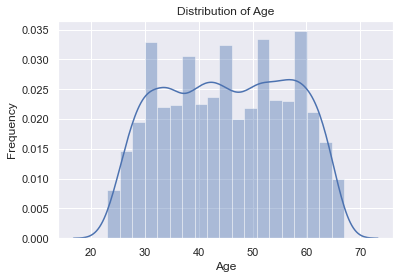

In [8]:
plt.title('Distribution of Age')
plt.xlabel('AGE')
plt.ylabel('Frequency')
sns.distplot(loandata['Age'])
plt.show()

customer's age is uniformly distributed. few customers age has peak values age. 

## Distribution Of Customer Experience

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


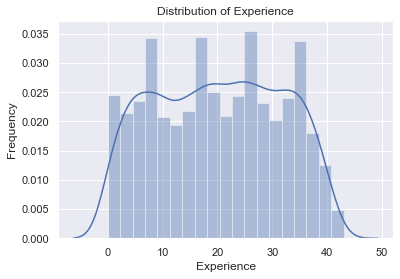

In [9]:
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
sns.distplot(loandata['Experience'])
plt.show()

customers Experience is uniformly distributed. few customers experience has peak values

## Distribution Of Customer Income

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


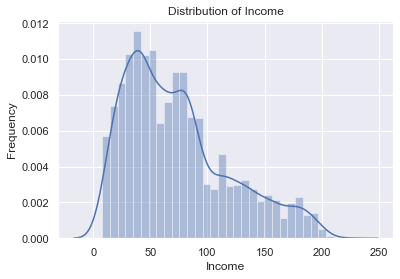

In [10]:
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
sns.distplot(loandata['Income'])
plt.show()

The customer annual income distribution is skewed towards right.

## Measure of skewness of Income

In [11]:
income_skew = loandata['Income'].skew();
print ('Measure of Skewness of Income: ', income_skew )

Measure of Skewness of Income:  0.8413386072610816


The atrributes Income is skewed towards right whch indicates the tail on right side of the curve is longer than left side of the curve.

## Distribution Of Customer CCAvg

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


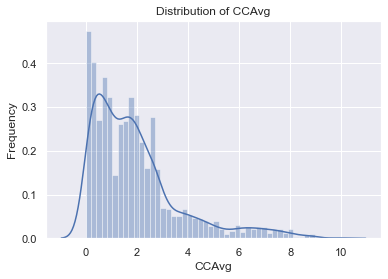

In [12]:
plt.title('Distribution of CCAvg')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
sns.distplot(loandata['CCAvg'])
plt.show()

The customer Avg. spending on credit cards per month distribution is skewed towards right.

## Measure of skewness of CCAvg

In [13]:
CCAvg_skew = loandata['CCAvg'].skew();
print ('Measure of Skewness of CCAvg: ', CCAvg_skew )

Measure of Skewness of CCAvg:  1.5984433366678663


The atrributes CCAvg is skewed towards right whch indicates the tail on right side of the curve is longer than left side of the curve.

## Distribution Of Customer Mortgage

C:\Users\Sanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


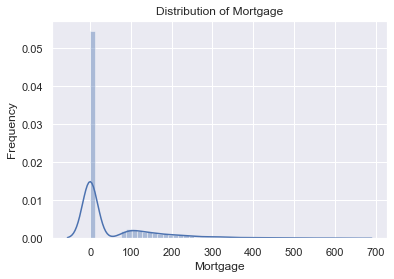

In [14]:
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
sns.distplot(loandata['Mortgage'])
plt.show()

The customer Value of house mortgage distribution is skewed towards right.

## Measure of skewness of Mortgage

In [15]:
Mortgage_skew = loandata['Mortgage'].skew();
print ('Measure of Skewness of Mortgage: ', Mortgage_skew );

Measure of Skewness of Mortgage:  2.1040023191079444


The atrributes Mortgage is skewed towards right whch indicates the tail on right side of the curve is longer than left side of the curve.

## Checking the presence of outliers Income,CCAvg and Mortgage

In [16]:
# define a function for identifying the outliers
def find_outliers(data, attribute):
    # sort the attribute
    data.sort_values(by=attribute)
    # quartile 25: indicates first quartile
    quartiles_25 = np.percentile(data[attribute], [25]) 
    # quartile 75: indicates third quartile
    quartiles_75 = np.percentile(data[attribute], [75])
    # inter quartile range
    IQR =  quartiles_75 - quartiles_25
    # find lower bound q1 - (1.5 *IQR)
    lower_bound = quartiles_25 - (1.5 * IQR)
    # find upper bound  q3 - (1.5 *IQR)
    upper_bound = quartiles_75  + (1.5 * IQR )
    
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')

    print (attribute + ': quartile_75 : ', quartiles_75, 
           '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
           '\n'+ attribute+ ': IQR : ', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_bound, 
           '\n'+ attribute+ ': upper_bound : ', upper_bound)
    
    print (attribute + ': Any data lower than : ' , lower_bound , ' and upper than :' , upper_bound , ' is considered as outlier')

### Checking the presence of outliers Income

Presense Of Outliers In INCOME
---------------------------
Income: quartile_75 :  [98.] 
Income: quartile_25 :  [39.] 
Income: IQR :  [59.] 
Income: lower_bound :  [-49.5] 
Income: upper_bound :  [186.5]
Income: Any data lower than :  [-49.5]  and upper than : [186.5]  is considered as outlier


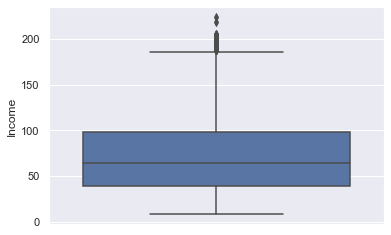

In [17]:
# presence of outliers in ‘Income’
find_outliers(loandata,'Income')
sns.boxplot(y=loandata['Income'])
plt.show()

### Checking the presence of outliers CCAvg

Presense Of Outliers In CCAVG
---------------------------
CCAvg: quartile_75 :  [2.5] 
CCAvg: quartile_25 :  [0.7] 
CCAvg: IQR :  [1.8] 
CCAvg: lower_bound :  [-2.] 
CCAvg: upper_bound :  [5.2]
CCAvg: Any data lower than :  [-2.]  and upper than : [5.2]  is considered as outlier


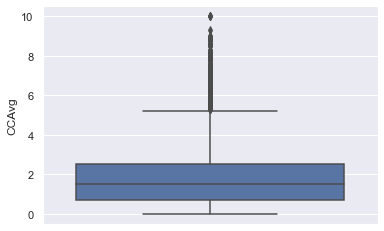

In [18]:
# presence of outliers in ‘CCAvg’
find_outliers(loandata,'CCAvg')
sns.boxplot(y=loandata['CCAvg'])
plt.show()

### Checking the presence of outliers Mortgage

Presense Of Outliers In MORTGAGE
---------------------------
Mortgage: quartile_75 :  [101.] 
Mortgage: quartile_25 :  [0.] 
Mortgage: IQR :  [101.] 
Mortgage: lower_bound :  [-151.5] 
Mortgage: upper_bound :  [252.5]
Mortgage: Any data lower than :  [-151.5]  and upper than : [252.5]  is considered as outlier


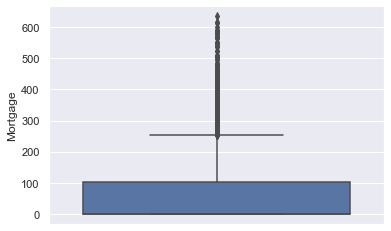

In [19]:
# presence of outliers in ‘Mortgage’
find_outliers(loandata,'Mortgage')
sns.boxplot(y=loandata['Mortgage'])
plt.show()

## Distribution of categorical column Family

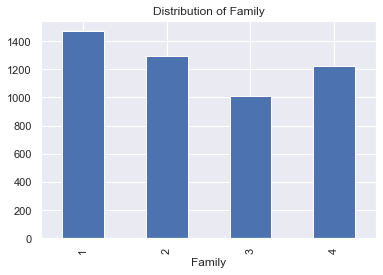

Family
1    1472
2    1296
3    1010
4    1222
dtype: int64

In [20]:
data_family= loandata.groupby('Family').size();
data_family.plot.bar(title = 'Distribution of Family')
plt.show();
data_family

The distribution of the Family members indicates that 
the family size 1 having more and family size is 3 has lesser

## Distribution of categorical column Education

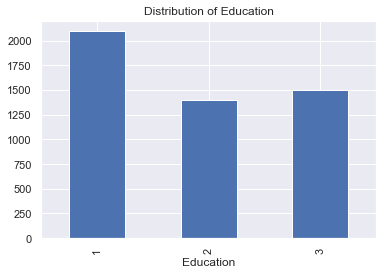

In [21]:
data_education = loandata.groupby('Education').size();
data_education.plot.bar(title = 'Distribution of Education')
plt.show();


In [22]:
data_education

Education
1    2096
2    1403
3    1501
dtype: int64

The distribution of the Education members indicates that the undergraduates (1) having more and graduates (2) are less.

## Distribution of categorical column Personal Loan

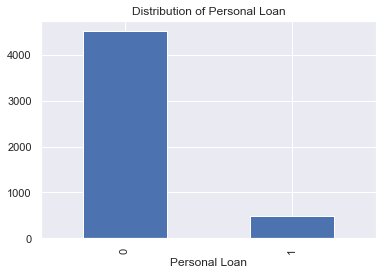

Personal Loan
0    4520
1     480
dtype: int64

In [23]:
data_Personal_Loan = loandata.groupby('Personal Loan').size();

data_Personal_Loan.plot.bar(title = 'Distribution of Personal Loan')
plt.show();
data_Personal_Loan

The distribution of the Personal loan members indicates that category 1 having very less personal loans taken i.e 480 members.
no personal loan taken are members are high i.e 4520

((4520/5000) * 100) = 90.4% customers not having personal loan with bank

((480/5000) * 100) = 9.6% customers having personal loan with bank

## Distribution of categorical column Securities Account

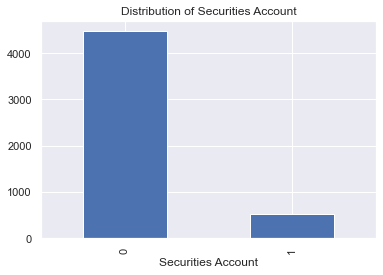

Securities Account
0    4478
1     522
dtype: int64

In [24]:
data_securities_account = loandata.groupby('Securities Account').size();

data_securities_account.plot.bar(title = 'Distribution of Securities Account')
plt.show();
data_securities_account

The distribution of the Securities Account members indicates that category 1 having very less security accounts i.e 522 members. no security account taken are members are high i.e 4478

((4478/5000) * 100)  = 90% customers not having security account with bank

((522/5000) * 100)  =  10% customers having security account with bank

## Distribution of categorical column CD Account

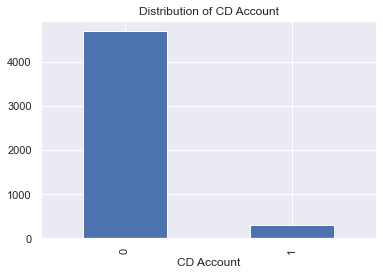

CD Account
0    4698
1     302
dtype: int64

In [25]:
data_CD_Account = loandata.groupby('CD Account').size();

data_CD_Account.plot.bar(title = 'Distribution of CD Account')
plt.show();
data_CD_Account

The distribution of the certificate of deposit (CD) with bank indicates that category 1 having very less certificat deposits i.e 302 members. no certificate deposits members are high i.e 4698.


((4689/5000) * 100) = 94% customers not having certifcate of deposit with bank. 

((302/5000) * 100) = 6% customers are having certicate deposit with bank.

## Distribution of categorical column Online

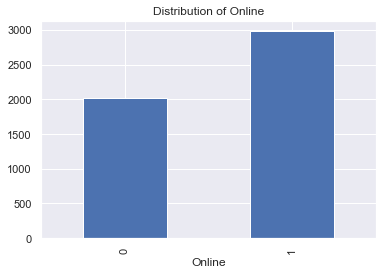

Online
0    2016
1    2984
dtype: int64

In [26]:
data_Online = loandata.groupby('Online').size();

data_Online.plot.bar(title = 'Distribution of Online')
plt.show();
data_Online

The distribution of the Online accounts with bank indicates that category 1 having very higer i.e 2984 members. no online accounts with banks are 2016.

((2016/5000) * 100)  = 40% customers not having online accounts with the bank.

((2984/5000) * 100)  = 60% customers having online accounts with the bank.


## Distribution of categorical column CreditCard

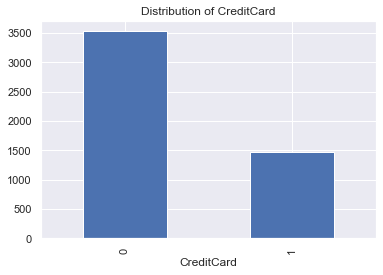

CreditCard
0    3530
1    1470
dtype: int64

In [27]:
data_Credit_card = loandata.groupby('CreditCard').size();

data_Credit_card.plot.bar(title = 'Distribution of CreditCard')
plt.show();
data_Credit_card

The distribution of the credit card indicates that category 1 having very less credit cards issued by bank i.e 1470. no credit cares issues numbers are high i.e 3530

((3530/5000) * 100)  = 70% customers not having credit cards

((1470/5000) * 100)  =  nearly 30% customers having credit cards


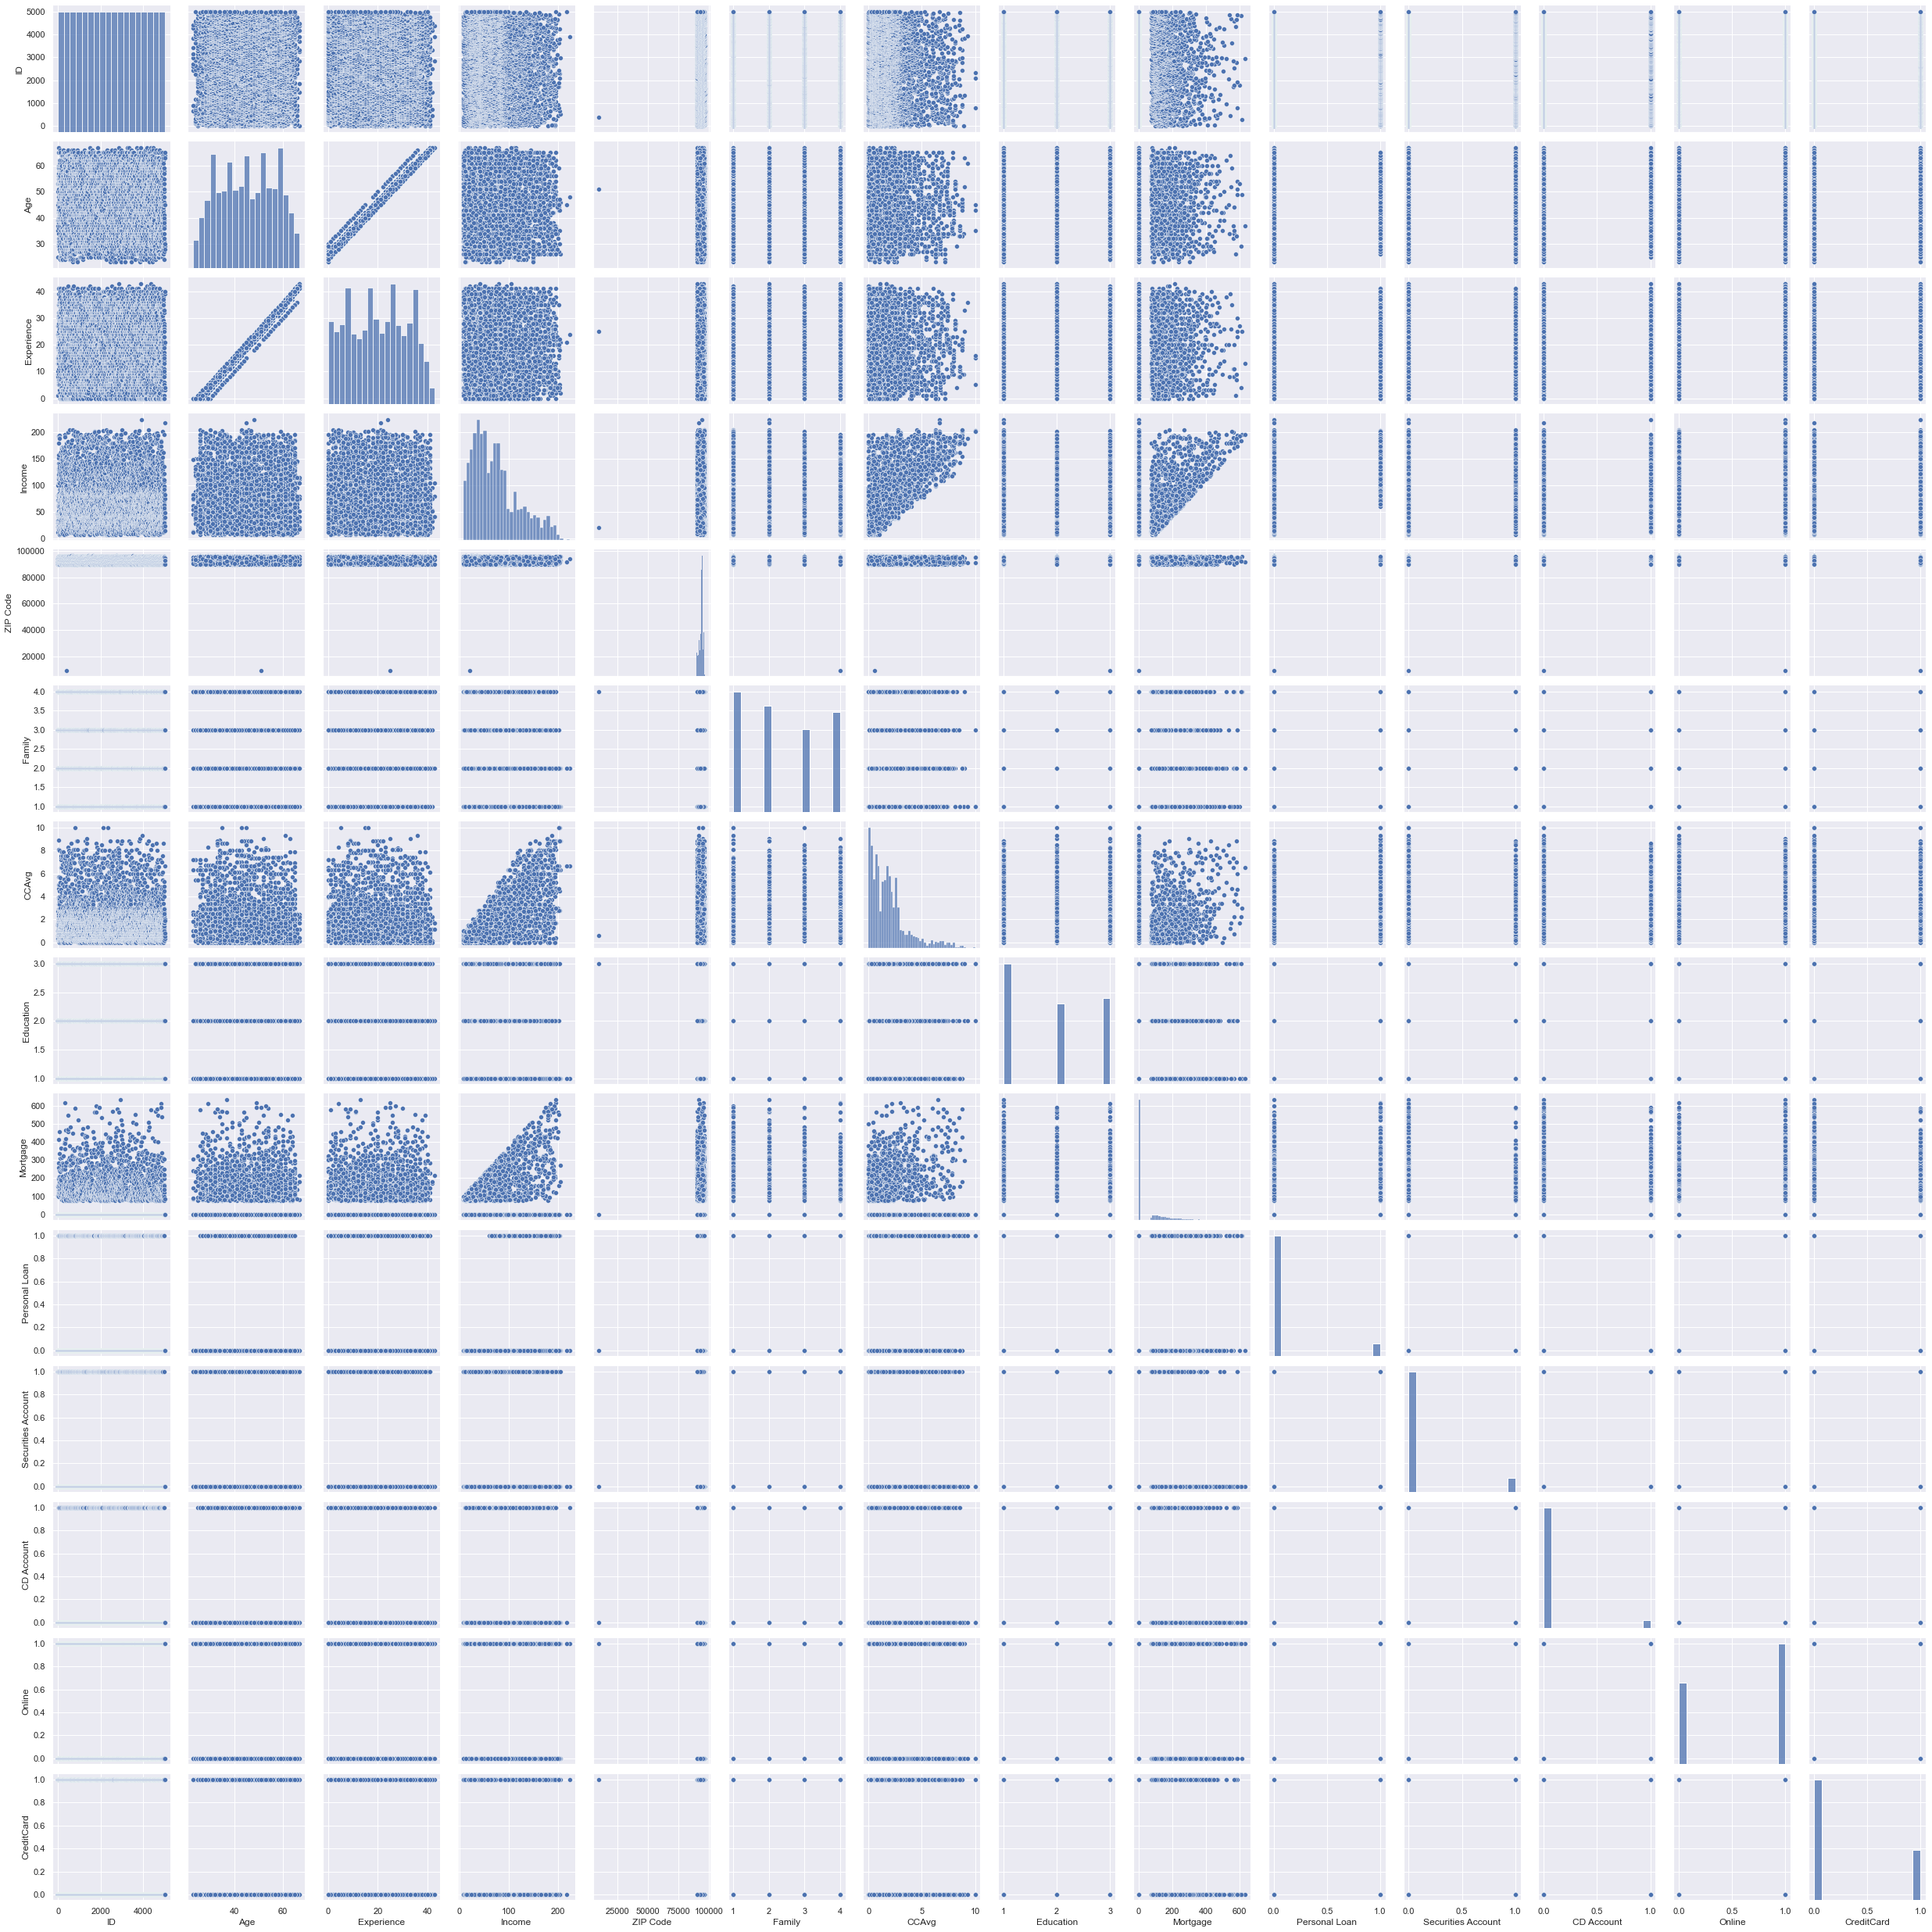

In [28]:
sns.pairplot(loandata);

from the above pair plot it is observed that age and experience are having high relation. also income and CCAvg is highley correlated

## Identify corelation of the data

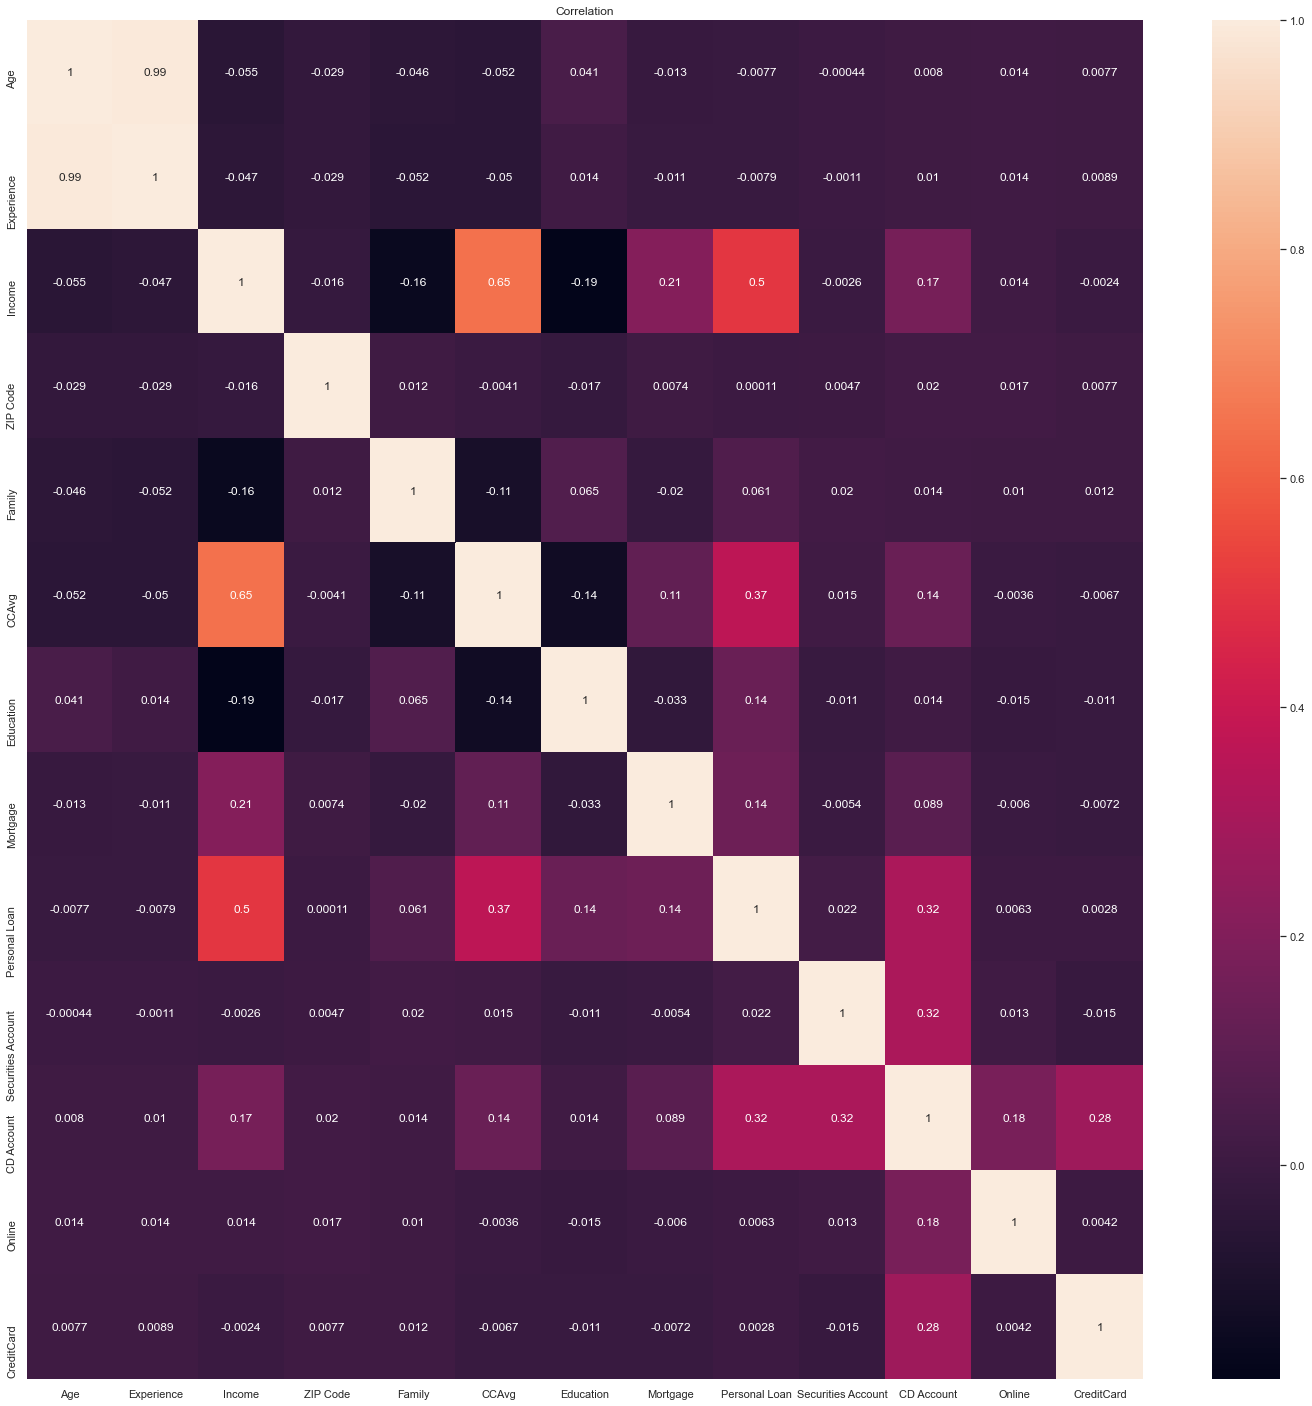

In [29]:
loandata.corr()
df = loandata.drop(loandata[['ID']],axis=1)
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), annot=True, linecolor='white')
plt.title('Correlation')
plt.show();

#### from the heat map. it is observed that 
#### 1) age and experience is highly correlated
#### 2) income and CCAvg is highley correlated

# Split the dataset into training and test

In [30]:
from sklearn.model_selection import train_test_split

# define the X variable. ID is not use. so drop this column. Personal Loan variable is target variable so drop this variable.
# X values having independant features.
X = loandata.drop(loandata[['ID','Personal Loan']], axis=1)
# define the Y variable. personal loan is the target variable. its dependant variable
Y = loandata[['Personal Loan']]  
# split the data for train and test set. train data 70% and test data 30%
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=2)

# Logistic Regression

 # Build Logistic Regression Model For Training Set

In [31]:

from sklearn.linear_model import LogisticRegression

# build logistic regression model
logisticRegression = LogisticRegression(solver='lbfgs');
# train the model with training set
logisticRegression.fit(X_train, y_train.values.ravel())

LogisticRegression()

## Performance of the model with training data

In [32]:
# use score method for accuray of model
train_score = logisticRegression.score(X_train,y_train);
print ("logit training accuracy score {0:.2f}".format(train_score))

logit training accuracy score 0.91


## Performance of the model with testing data 

In [33]:
# use score method for accuray of model
test_score = logisticRegression.score(X_test,y_test);
print ("logit test accuracy score {0:.2f}".format(test_score))

logit test accuracy score 0.90


Accuracy of logistic regression classifier on test set: 0.90

## Predict for Test set

make predictions on test set and build the confusion metrix

In [34]:
test_y_predict = logisticRegression.predict(X_test);

## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix_test = confusion_matrix(y_test,test_y_predict)
print("confusion matrix test set = \n",matrix_test)

confusion matrix test set = 
 [[1316   46]
 [  99   39]]


<AxesSubplot:>

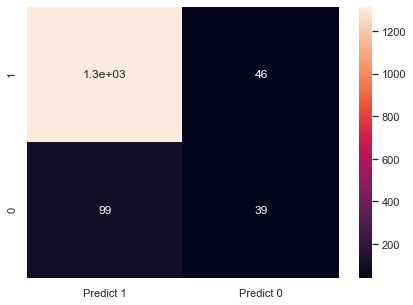

In [36]:
df_cm = pd.DataFrame(matrix_test, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The result is telling us that we have 1316+39 = 1355 correct predictions and 99+46 =144 incorrect predictions.

## Evaluate the model by Computing precision, recall, F-measure 

In [37]:
print(classification_report(y_test, test_y_predict))

NameError: name 'classification_report' is not defined

#### Of the entire test set, 89% of the customer’s preferred personal loan

## ROC curve

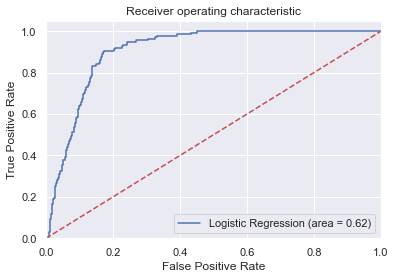

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logisticRegression.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logisticRegression.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Naive Bayes

# Naive Bayes: Build Model For Training Set 

In [39]:
from sklearn.naive_bayes import GaussianNB

# create the model
naivemodel = GaussianNB()
naivemodel.fit(X_train,y_train.values.ravel())

GaussianNB()

## Performance of the model with training data

In [40]:
from sklearn import metrics
y_train_predict = naivemodel.predict(X_train)
train_data_score = metrics.accuracy_score(y_train,y_train_predict)
print("Traing Data Accuracy Score : {0:.4f}".format(train_data_score))

Traing Data Accuracy Score : 0.8934


## Performance of the model with testing data

In [41]:
from sklearn import metrics
y_test_predict = naivemodel.predict(X_test)
test_data_score = metrics.accuracy_score(y_test,y_test_predict)
print("Test Data Accuracy Score: {0:.4f}".format(test_data_score))

Test Data Accuracy Score: 0.8927


## Check the confusion matrix and classifcation report

In [42]:
metrics.confusion_matrix(y_test,y_test_predict)

array([[1267,   95],
       [  66,   72]], dtype=int64)

The result is telling us that we have 1267+72 = 1339 correct predictions and 66+95 =161 incorrect predictions.

In [43]:
print(classification_report(y_test, y_test_predict))

NameError: name 'classification_report' is not defined

Of the entire test set, 89% of the customer’s preferred personal loan

## Naive Bayes: ROC curve 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

naive_roc_auc = roc_auc_score(y_test, naivemodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, naivemodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % naive_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)
when compared with Logistic regression ROC curve is 0.62, Naive Bayes ROC curve is 0.73 which high. More are is covered which is is performing better than Logistic regression

# K-NN

### First let us first observe the accuracies for different values of k.

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train.values.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


In [ ]:
y_train.values.ravel()

## generate plot for KNN neighbours

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

It is observed that from the above get maximum testing accuracy for k=21. So lets create a KNeighborsClassifier with number of neighbors as 21.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup a knn classifier with k neighbors
knnmodel = KNeighborsClassifier(n_neighbors=21)

knnmodel.fit(X_train,y_train.values.ravel())

## Performance of the model with training data

In [ ]:
# user score method for accuray of model
knn_train_score = knnmodel.score(X_train,y_train);
print ("knn training score", knn_train_score)

## Performance of the model with test data

In [ ]:
# user score method for accuray of model
knn_test_score = knnmodel.score(X_test,y_test);
print ("knn test score", knn_test_score)

## Check the confusion matrix and classifcation report

In [ ]:
y_knn_pred = knnmodel.predict(X_test)

metrics.confusion_matrix(y_test,y_knn_pred)

The result is telling us that we have 1354+7 = 1361 correct predictions and 131+8 =139 incorrect predictions.

In [ ]:
print(classification_report(y_test, y_knn_pred))

Of the entire test set, 87% of the customer’s preferred personal loan

## KNN: ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knnmodel.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knnmodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 
KNN ROC curve is 0.52

## conclusion:

Logistic Regression, Naive Bayes and K-NN model analysis, Naive bayes model is performing better. 
Logistic regression ROC curve is 0.62
Naive Bayes ROC curve is 0.73
K-NN ROC  curve is 0.52

A good classifier stays as far away from that line as possible (toward the top-left corner) 
when compared with Logistic regression ROC curve is 0.62, K-NN ROC  curve is 0.52, the Naive Bayes ROC curve is 0.73 which high.
More area is covered which is is performing better than Logistic regression and K-NN models